In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('../')

In [2]:
import numpy as np
import seaborn as sns
from chainer.iterators import SerialIterator
from chainer.optimizers import AdaGrad
from chainer.training.trainer import Trainer
from chainer.training.updater import StandardUpdater
from chainer.training.extensions import LogReport, PrintReport

In [3]:
from multivariate_normal import MVN

class NullUpdater(StandardUpdater):

    def update_core(self):
        self._iterators['main'].next()
        optimizer = self._optimizers['main']
        loss_func = self.loss_func or optimizer.target

        optimizer.update(loss_func)


mu = np.array([1.0, 4.0])
sigma = np.array([1.5, 1.0])
x0 = np.random.randn(100, 2)
model = MVN(mu, sigma, x0)

optimizer = AdaGrad(0.5)
optimizer.setup(model)
gpu = -1
updater = NullUpdater(SerialIterator([0], 1), optimizer, device=gpu)

n_epoch = 1000
trainer = Trainer(updater, (n_epoch, 'epoch'))
trainer.extend(LogReport(), trigger=(10, 'epoch'))
trainer.extend(PrintReport(['epoch', 'main/loss', 'main/nlogp']))
trainer.run()

epoch       main/loss   main/nlogp
10          79.1994     5.05876     
20          60.73       3.69486     
30          53.7222     3.2355      
40          51.1214     3.06079     
50          49.5341     2.98931     
60          49.4553     2.95696     
70          49.2385     2.94191     
80          49.1635     2.9347      
90          49.0722     2.93108     
100         49.0511     2.92945     
110         49.027      2.9288      
120         49.0705     2.92871     
130         49.1767     2.92856     
140         49.1728     2.92872     
150         49.2423     2.92881     
160         49.1947     2.92903     
170         49.1104     2.9294      
180         49.0943     2.92975     
190         48.9891     2.93012     
200         48.9146     2.93056     
210         48.9051     2.93088     
220         48.9982     2.93101     
230         49.0171     2.93103     
240         48.9427     2.9313      
250         48.8824     2.93163     
260         48.8924     2.93184     
270

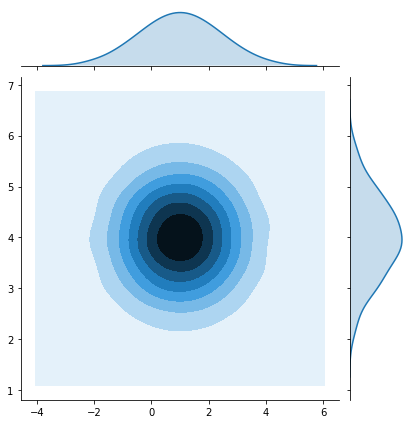

In [4]:
sns.jointplot(model.theta.data[:, 0], model.theta.data[:, 1], kind='kde', stat_func=None)